# Coding Exercise
## Spring-Mass-Damper System

In [56]:
%%html
<style type='text/css'>
.CodeMirror{
font-size: 13px;           # <- here you can tune the fontsize of the jupyter notebook
</style>

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [58]:
hz = 1000 # rate of computed points per second

# define some constants
CRITICALLY_DAMPED = 1
UNDER_DAMPED      = 2
OVER_DAMPED       = 3

damping_type = {CRITICALLY_DAMPED : 'critically damped', 
                UNDER_DAMPED      : 'under-damped', 
                OVER_DAMPED       : 'over-damped'}

--------

## Natural System

The dynamics of control variable x is determined by the equation of motion:  $\hspace{0.2cm}  m\ddot{x} + b\dot{x} + kx = 0$

The system's behavior can fall in one of these three categories:

Critically damped system: $\hspace{0.2cm}  b = 2 \sqrt{m k} \hspace{1cm}$ 
Over-damped system: $\hspace{0.2cm}  b > 2 \sqrt{m k} \hspace{1cm}$
Under-damped system: $\hspace{0.2cm}  b < 2 \sqrt{m k} \hspace{1cm}$ 

In [59]:
def generate_trajectory(x: float, dx: float, ddx: float, 
                        m: float, b:  float, k:   float, 
                        duration: float, hz: float=50) -> list[float]:
    '''
    Computes numerically a trajectory of control variable x, for a given initial position, 
    velocity, and acceleration of x, and for a given spring constant, damping, 
    and mass of the spring mass damper system.
    
    :param   x:       initial position of control variable x
    :param  dx:       initial velocity of control variable x
    :param ddx:       initial acceleration of control variable x
    :param   m:       mass [in kg]
    :param   b:       friction coefficient (damping)
    :param   k:       spring constant
    :param duration:  time duration of simulated trajectory [in seconds]
    :param hz:        number of simulated points per second
    
    :return:          position trajectory of control variable x
    '''
    xs = []
    for i in range(duration * hz):
        
        # store current position of control variable 
        xs.append(x)

        # determine acceleration based on current system state
        ddx   = -(b * dx) / m - (k * x) / m
        
        # update velocity based on new acceleration
        dx   += ddx / hz
        
        # update position based on new velocity
        x    += dx  / hz
    # --
    
    return xs
# ---

In [60]:
def plot_trajectory(xs: list[float], hz: float, title=None) -> None:
    '''
    Plots a position trajectory of control variable x.
    
    :param xs:   list containing positions of x
    :param hz:   number of simulated points per second
    '''
    plt.figure(figsize=(8, 3), dpi=200)

    ts = np.arange(len(xs), dtype=float) / hz
    plt.plot(np.arange(len(xs)) / hz, xs)

    plt.xlabel('Time [s]')
    plt.ylabel('x')    
    
    if title is not None:
        plt.title(title)
    
    plt.show()
# ---

--------

## Critically damped -vs- under-damped -vs- over-damped

Task: Tune the system parameters m, b and k to obtain a i) cricitally damped system, ii) under-damped system, and iii) over-damped system. 

Values of all system parameters must be positive!

In [72]:
def get_damping_type(m: float, b: float, k: float) -> bool:
    '''
    Decides whether a spring-mass-damper system is critically, under-damped, or over-damped.
    
    :param m:    mass in kg
    :param b:    friction coefficient
    :param k:    spring constant
    
    :return:     a type that is element of [CRITICALLY_DAMPED, UNDER_DAMPED, OVER_DAMPED]
    '''
    if b == 2 * np.sqrt(m * k):
        return CRITICALLY_DAMPED
    elif b < 2 * np.sqrt(m * k):
        return UNDER_DAMPED
    else:
        return OVER_DAMPED
# ---

In [79]:
# sanity check to see if your code above is correct
print(f'This should say "under-damped":          {damping_type[get_damping_type(1, 0, 1)]}')
print(f'This should say "over-damped":           {damping_type[get_damping_type(1, 1, 0)]}')
print(f'This should say "critically damped":     {damping_type[get_damping_type(1, 2, 1)]}')

This should say "under-damped":          under-damped
This should say "over-damped":           over-damped
This should say "critically damped":     critically damped


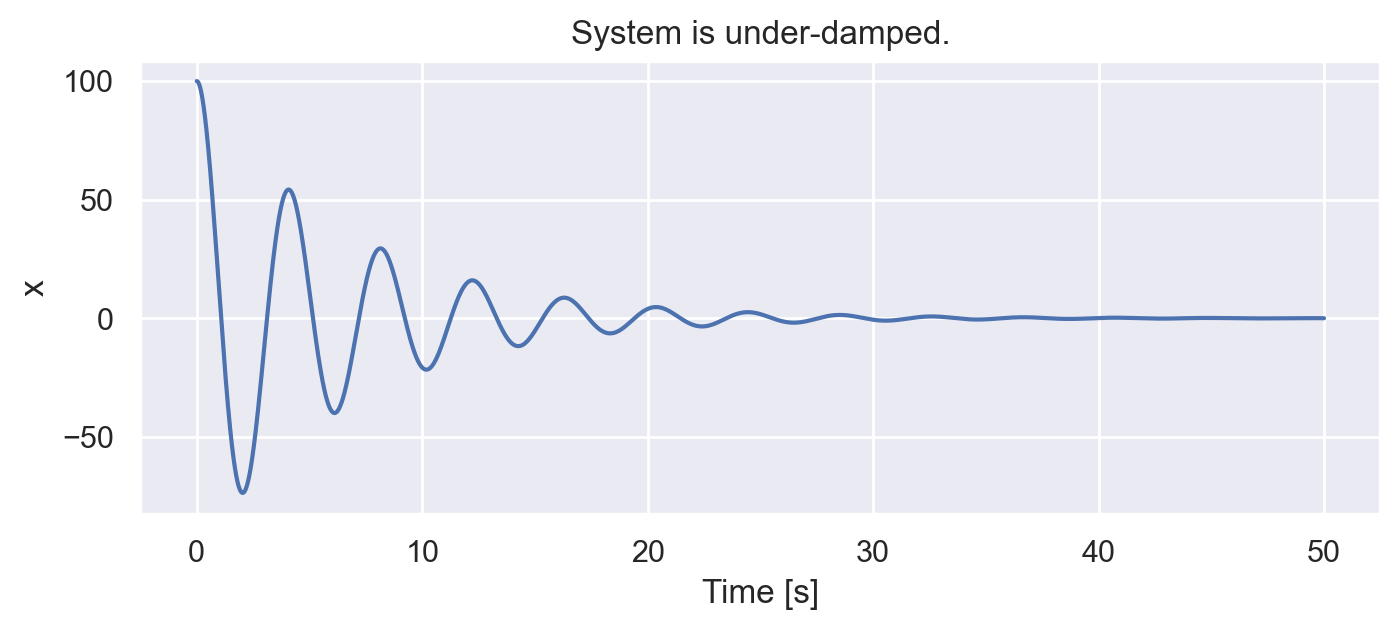

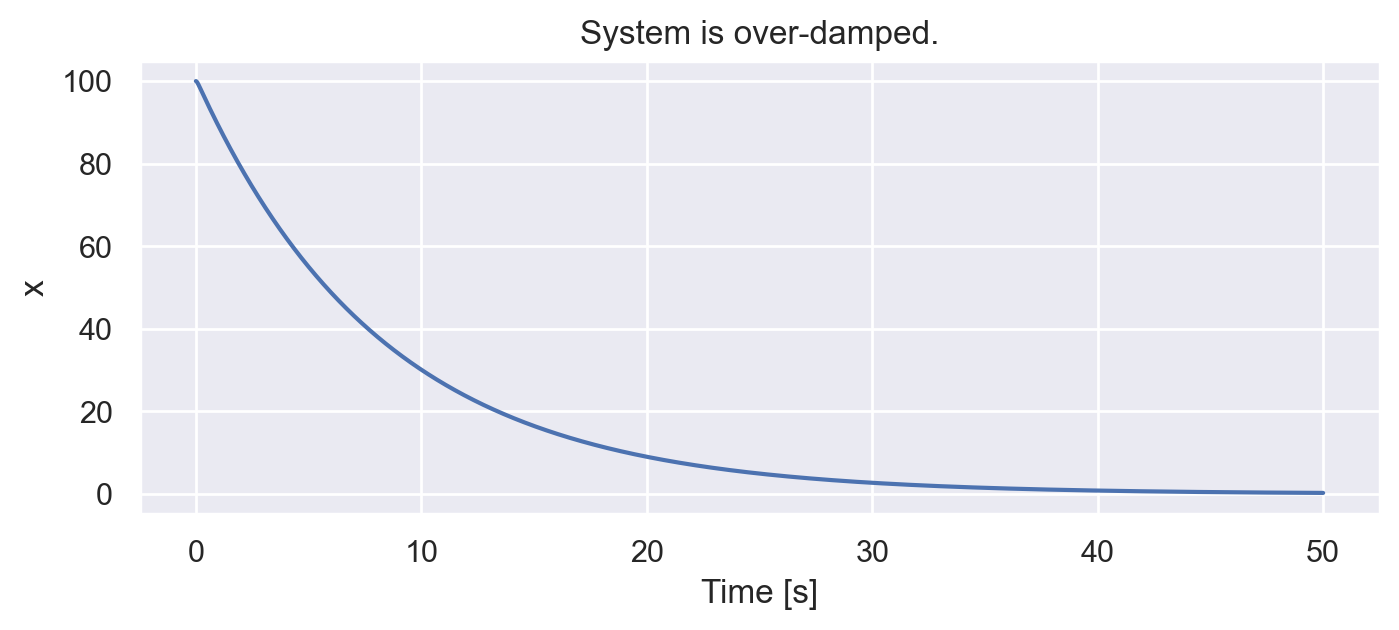

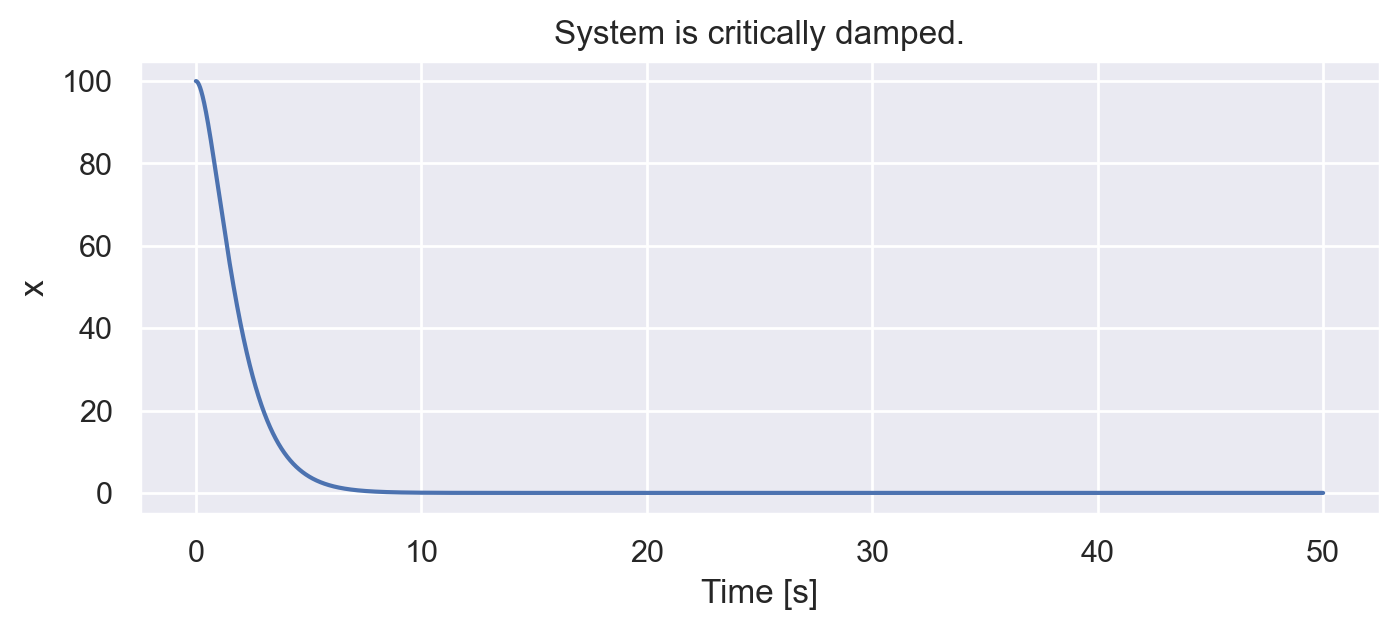

In [74]:
# under-damped
m = 5
b = 1.5
k = 12

xs = generate_trajectory(x=100., dx=0., ddx=0., m=m, b=b, k=k, duration=50, hz=hz)
plot_trajectory(xs, hz, title=f'System is {damping_type[get_damping_type(m, b, k)]}.')


# over-damped
m = 5
b = 100
k = 12

xs = generate_trajectory(x=100., dx=0., ddx=0., m=m, b=b, k=k, duration=50, hz=hz)
plot_trajectory(xs, hz, title=f'System is {damping_type[get_damping_type(m, b, k)]}.')


# critically-damped (do not use the values from the sanity check!)
m = 5
b = 10
k = 5

xs = generate_trajectory(x=100., dx=0., ddx=0., m=m, b=b, k=k, duration=50, hz=hz)
plot_trajectory(xs, hz, title=f'System is {damping_type[get_damping_type(m, b, k)]}.')

--------

## Harmonic Oscillator
Nice to know:

A harmonic oscillator is a spring-mass system (no damping). We can simulate this by setting the damping of a spring-mass-damper system to zero:

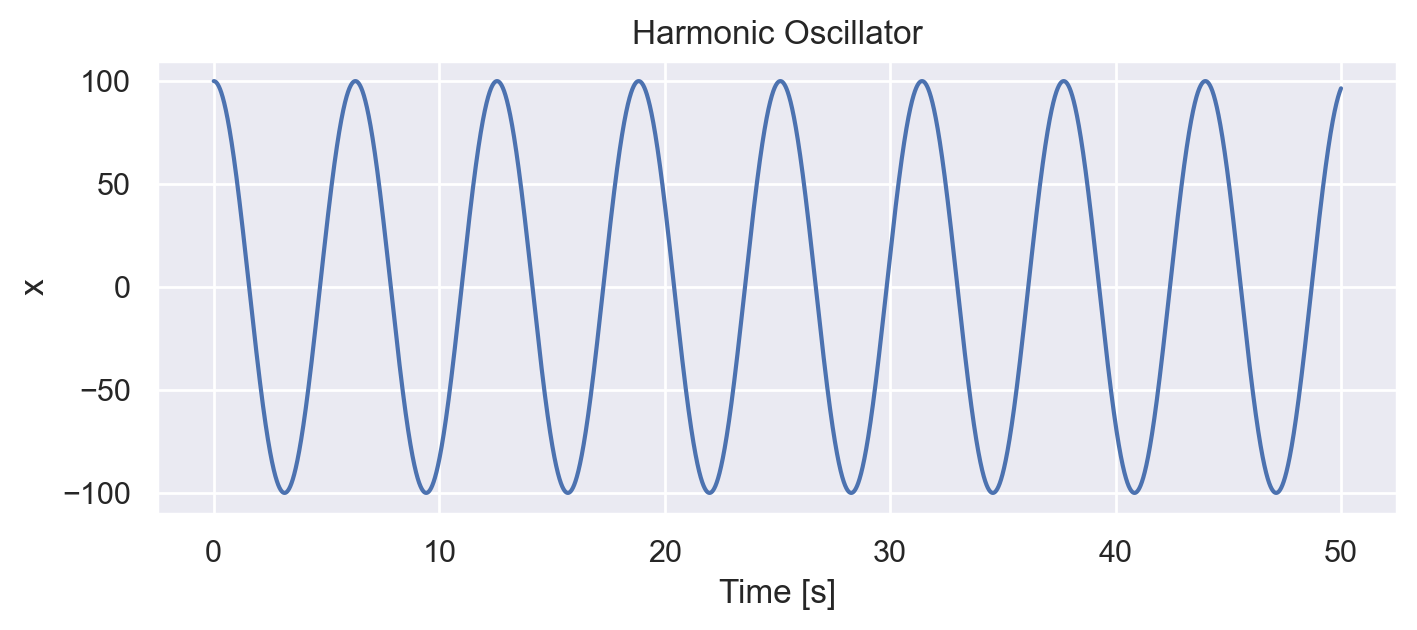

In [96]:
# harmonic oscillator
xs = generate_trajectory(x=100., dx=0., ddx=0., m=5, b=0, k=5, duration=50, hz=hz)
plot_trajectory(xs, hz, title='Harmonic Oscillator')

--------

## Automatically obtaining a critically damped system

Task: Implement the functions below that determine the friction b and the spring constant k, when the other system parameters are given, so that the resulting system is critically damped.

In [36]:
def get_critical_friction(k: float, m: float) -> float:
    '''
    Returns the friction coefficient that leads to a critically damped 
    spring-mass-damper system with a given mass and spring constant.
    
    :param k:    spring constant
    :param m:    mass [in kg]
    
    :return:     friction coefficient b
    '''
    return 2. * np.sqrt(k * m)
# ---

In [9]:
def get_critical_spring(b: float, m: float) -> float:
    '''
    Returns the spring constant that leads to a critically damped
    spring-mass-damper system with a given mass and friction.
    
    :param b:    friction coefficient
    :param m:    mass [in kg]
    
    :return:     spring constant k
    '''
    return b**2 / (4. * m)
# ---

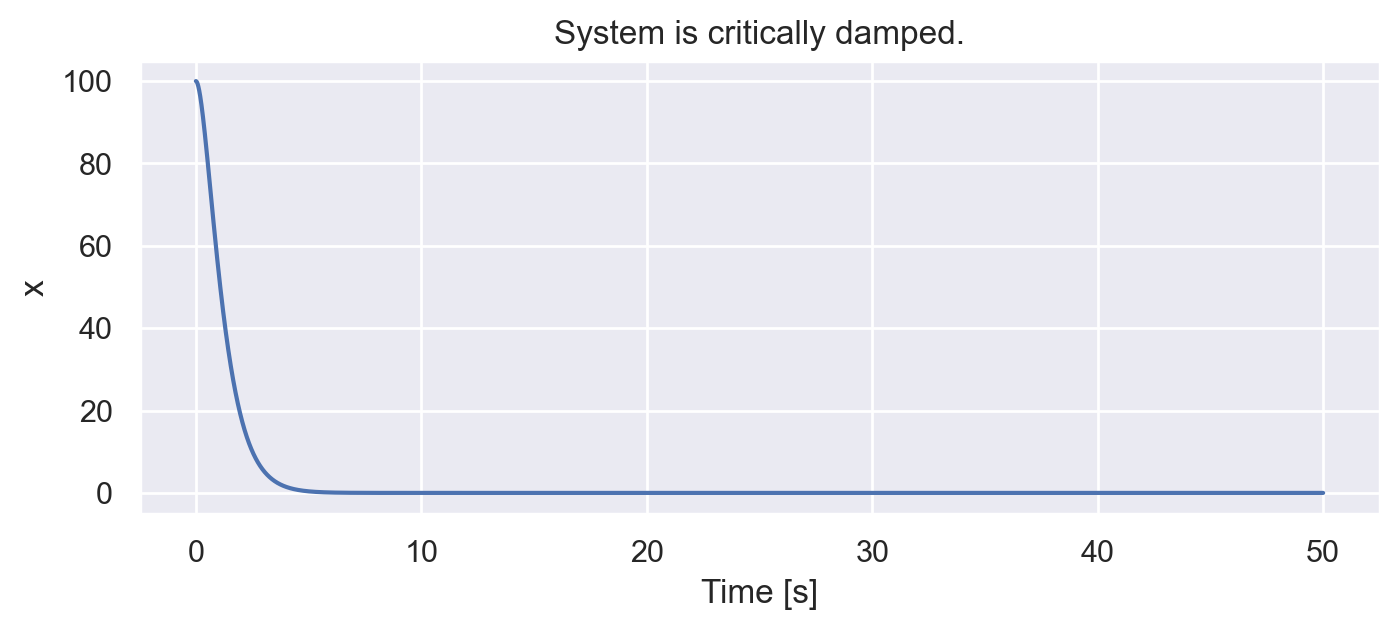

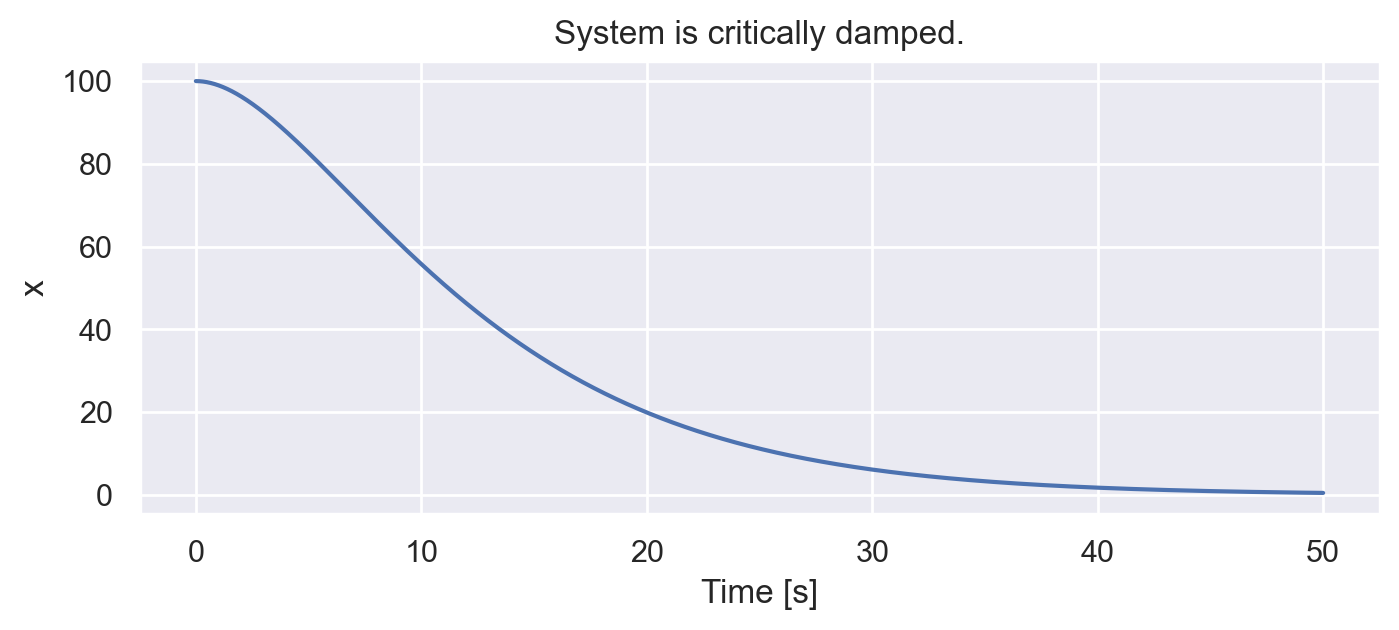

In [37]:
# critically damped system
m = 5
k = 12
b = get_critical_friction(k, m)

xs = generate_trajectory(x=100., dx=0., ddx=0., m=m, b=b, k=k, duration=50, hz=hz)
plot_trajectory(xs, hz, title=f'System is {damping_type[get_damping_type(m, b, k)]}.')


# critically damped system
m = 5
b = 1.5
k = get_critical_spring(b, m)

xs = generate_trajectory(x=100., dx=0., ddx=0., m=m, b=b, k=k, duration=50, hz=hz)
plot_trajectory(xs, hz, title=f'System is {damping_type[get_damping_type(m, b, k)]}.')

-----

## Closed-Loop Spring-Mass-Damper System

The system parameters $b$, $k$, and $m$ can actually not be modified since these are intrinsic properties of the physical system. In other words, their values depend on how the robot was built. In order to achieve a desired behavior, we apply an external control force $f$ whose value we can choose as we wish:

$m\ddot{x} + b\dot{x} + kx = f$


We choose $f$ to be a PD controller:

$f = -k_p x - k_v \dot{x}$ 


Now we can combine the natural system containing the intrinsic properties of the robot and the external control force to obtain the closed-loop system:

$m\ddot{x} + (b + k_v)\dot{x} + (k + k_p) = 0$


We simplify this equation by introducing the closed-loop stiffness $k_{cls}$ and the closed-loop friction $b_{cls}$:

$m\ddot{x} + b_{cls}\dot{x} + k_{cls}x = 0$

This means that if we know the intrinsic properties of our physical system, we can compute the control gains so that we obtain critical damping.

In [90]:
def get_critical_gains(m: float, b: float, k: float, k_cls: float) -> (float, float):
    '''
    Determines the control gains k_p and k_v so that a closed-loop spring-mass-damper system
    exhibits a desired closed-loop stiffness k_cls.
    
    :param m:       mass
    :param b:       intrinsic friction coefficient
    :param k:       intrinsic spring constant
    :param k_cls:   desired closed-loop stiffness
    
    :return:        tuple (k_p, k_v), containing the proportional gain k_p and the differential gain k_v
    '''
    b_cls = get_critical_friction(k_cls, m)
    return (k_cls - k, b_cls - b)
# ---

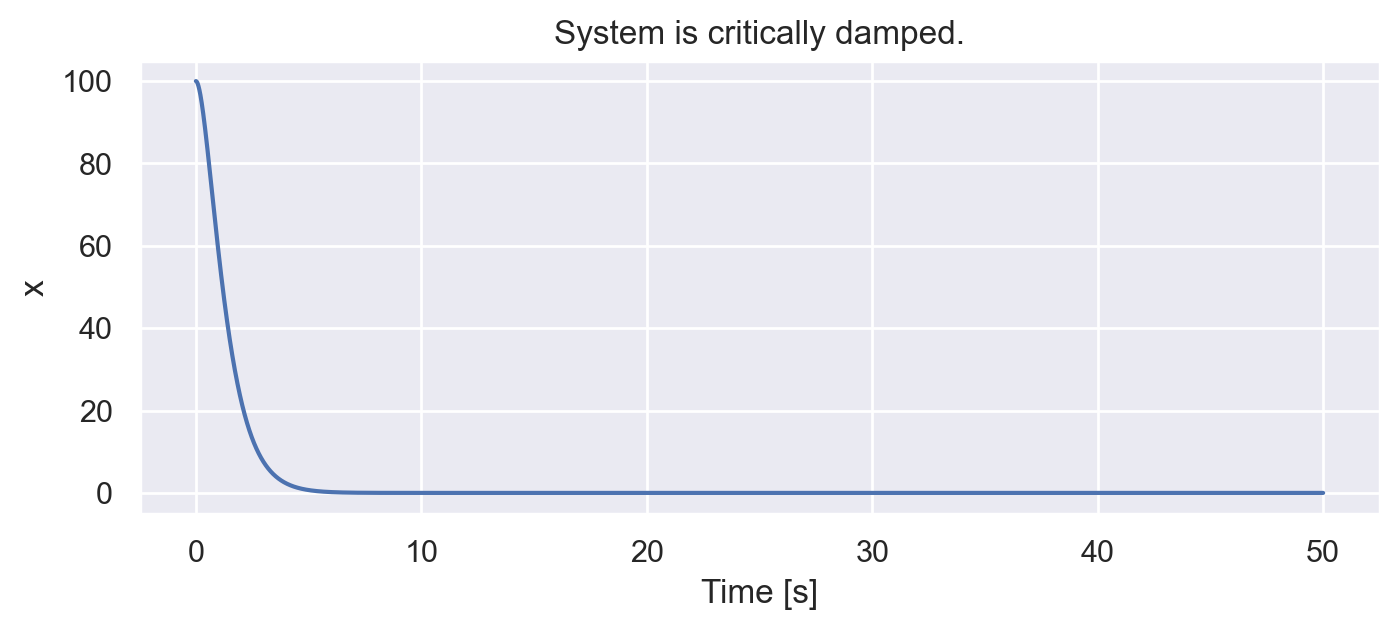

In [95]:
# intrinsic system parameters (do not change these values!)
m = 5
k = 12
b = 4

# we can freely choose a desired closed-loop stiffness
k_cls = 10

# compute gains to obtain a critically damped system 
# that has a desired closed-loop stiffness
k_p, k_v = get_critical_gains(m, b, k, k_cls)

# the closed-loop friction follows from the other parameters
b_cls = b + k_v

xs = generate_trajectory(x=100., dx=0., ddx=0., m=m, b=b_cls, k=k_cls, duration=50, hz=hz)
plot_trajectory(xs, hz, title=f'System is {damping_type[get_damping_type(m, b_cls, k_cls)]}.')